<a href="https://colab.research.google.com/github/dikshabhati1/looking_for_job_change/blob/main/job_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload = files.upload()

Saving aug_train.csv to aug_train.csv


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, log_loss, plot_roc_curve, auc, precision_recall_curve
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [32]:
df = pd.read_csv(io.BytesIO(upload['aug_train.csv']))

In [33]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [34]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [35]:
# shape
print('Shape of train is {}'.format(df.shape))

Shape of train is (19158, 14)


In [36]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [37]:
# null values
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

# Data Visualization

### Which gender is more likely to move for a new job?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


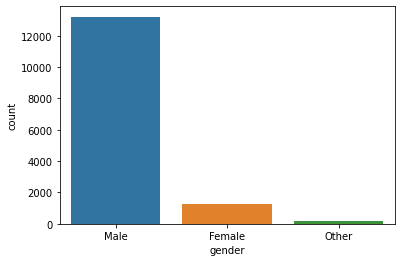

In [38]:
sns.countplot(df['gender'])

Text(0.5, 1.0, 'Gender % looking for new job')

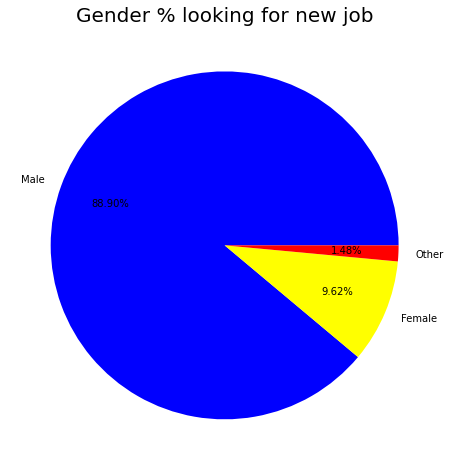

In [39]:
gender = df[df['target'] == 1]['gender']
temp = gender.value_counts()
labels = temp.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = temp, labels = labels , colors = ['blue','yellow','red'], autopct="%.2f%%",pctdistance=0.7)
plt.title('Gender % looking for new job', fontsize=20)

In [41]:
male_newjob = df[(df['gender']=='Male') & df['target']==1]
female_newjob = df[(df['gender']=='Female') & df['target']==1]

# print
print('{} % of male who are looking for a new job'.format(len(male_newjob)/len(df['gender']=='Male')*100))
print('{} % of female who are looking for a new job'.format(len(female_newjob)/len(df['gender']=='Female')*100))

15.721891637958032 % of male who are looking for a new job
1.7016390019835057 % of female who are looking for a new job


### From which company type people are looking for new job?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


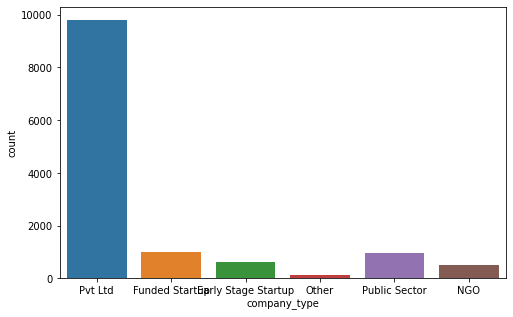

In [42]:
plt.figure(figsize=(8,5))
sns.countplot(df['company_type'])
plt.show()

From above we can see that most people work in private companies

Text(0.5, 1.0, 'People leaving company')

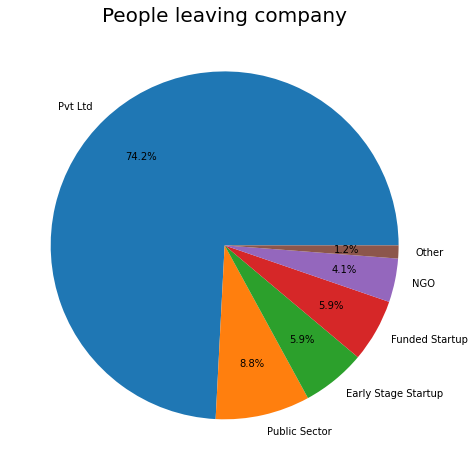

In [43]:
company_type = df[df['target'] == 1]['company_type']
temp = company_type.value_counts()
labels = temp.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = temp, labels = labels, autopct="%.1f%%",pctdistance=0.7)
plt.title('People leaving company', fontsize=20)

In [44]:
for i in df['company_type'].unique():
    company_newjob = df[(df['company_type']==i) & df['target']==1]
    print('{} % of {} who are looking for a new job'.format(len(company_newjob)/len(df['company_type']==i)*100,i))

0.0 % of nan who are looking for a new job
9.2650589831924 % of Pvt Ltd who are looking for a new job
0.7307652155757386 % of Funded Startup who are looking for a new job
0.741204718655392 % of Early Stage Startup who are looking for a new job
0.15137279465497444 % of Other who are looking for a new job
1.096147823363608 % of Public Sector who are looking for a new job
0.5063158993631903 % of NGO who are looking for a new job


So from above we can see that the maximum number of people who are looking for new job are from private companies

### People with relevant experience are looking for a new job?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


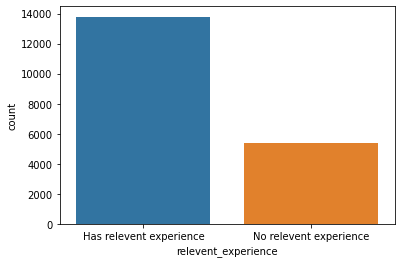

In [45]:
sns.countplot(df['relevent_experience'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relevent experience on the basis of target')

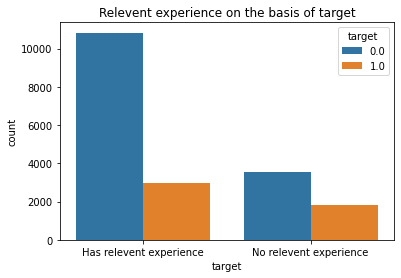

In [46]:
sns.countplot(df['relevent_experience'],hue=df['target'])
plt.xlabel('target')
plt.ylabel('count')
plt.title('Relevent experience on the basis of target')

In [47]:
yes_newjob = df[(df['relevent_experience']=='Has relevent experience') & df['target']==1]
no_newjob = df[(df['relevent_experience']=='No relevent experience') & df['target']==1]

# print
print('{} % of having relevant experience who are looking for a new job'.format(len(yes_newjob)/len(df['relevent_experience']=='Has relevent experience')*100))
print('{} % of not havinf relevant experience who are looking for a new job'.format(len(no_newjob)/len(df['relevent_experience']=='No relevent experience')*100))

15.45568430942687 % of having relevant experience who are looking for a new job
9.479068796325295 % of not havinf relevant experience who are looking for a new job


### Did any people got into data science field without having graduation degree?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


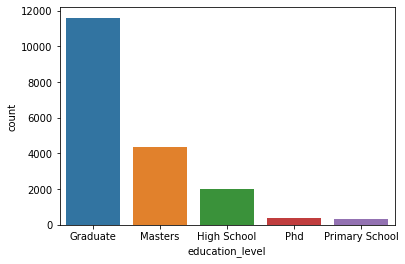

In [48]:
sns.countplot(df['education_level'])

In [49]:
people_withoutdegree = df[(df['education_level'] == 'Primary School')& (df['education_level']=='High School') & (df['enrolled_university'] == "no_enrollment")]
print("People who have got into the data science world without graduation are", len(people_withoutdegree))

People who have got into the data science world without graduation are 0


So their is not a single person who get into this field without graduation.

### Years between last and current job?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


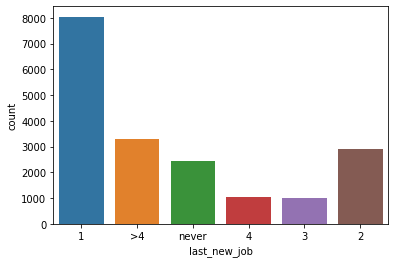

In [50]:
sns.countplot(df['last_new_job'])

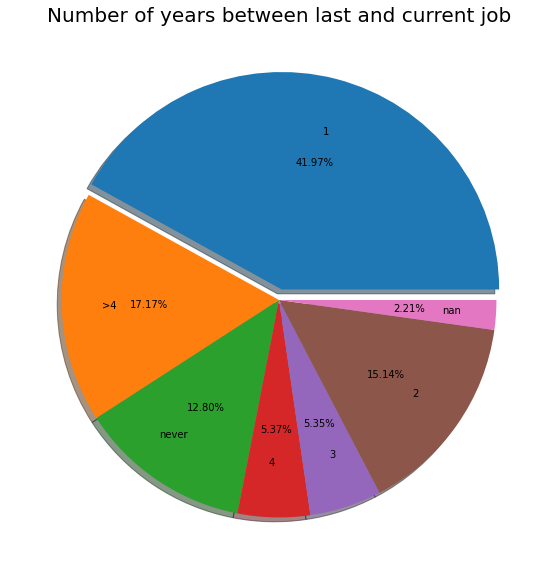

In [53]:
fig, ax = plt.subplots(figsize=(10, 10))
count = Counter(df['last_new_job'])
plt.pie(count.values(), labels=count.keys(), labeldistance=0.75, autopct=lambda p:f'{p:.2f}%',
       explode=[0.05]+[0]*6, shadow=True)
plt.title('Number of years between last and current job', fontsize=20)
plt.show()

# Data Preprocessing

First of all we are going to drop unnecessary columns,so we don't require enrollee_id and city column

In [54]:
df.drop(['enrollee_id','city'],axis=1,inplace=True)

### Countplot for some categorical feature

We already have seen countplot for various features.Now,we are going to see countplot for the features we haven't seen yet

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


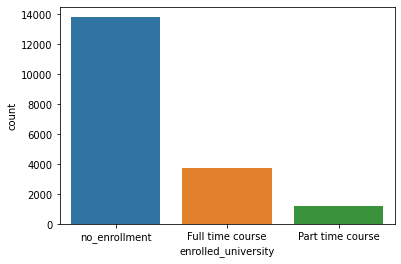

In [55]:
sns.countplot(df['enrolled_university'])

So it's seems like most people wjo are currently doing job haven't enrolled in any university

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


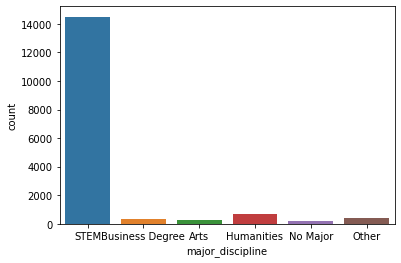

In [56]:
sns.countplot(df['major_discipline'])

In [57]:
df.replace(to_replace = 'Has relevent experience',value = 'Yes',inplace = True)
df.replace(to_replace = 'No relevent experience',value='No',inplace = True )

df.replace(to_replace = '<1',value = '0',inplace = True)
df.replace(to_replace = '>20',value = '21',inplace=True)
df.replace(to_replace = 'never',value = '0',inplace=True)
df.replace(to_replace = '>4',value = '5',inplace=True)

df.replace(to_replace = '<10',value = 'around_10',inplace=True)
df.replace(to_replace = '10/49',value = 'around_50',inplace=True)
df.replace(to_replace = '50-99',value = 'around_100',inplace=True)
df.replace(to_replace = '100-500',value = 'around_500',inplace=True)
df.replace(to_replace = '500-999',value = 'around_1000',inplace=True)
df.replace(to_replace = '1000-4999',value = 'around_5000',inplace=True)
df.replace(to_replace = '5000-9999',value = 'around_10000',inplace=True)
df.replace(to_replace = '10000+',value = 'more_than_10000',inplace=True)

df.replace(to_replace = 'Full time course',value = 'Full_time_course',inplace=True)
df.replace(to_replace = 'Part time course',value = 'Part_time_course',inplace=True)

df.replace(to_replace = 'Primary School',value = 'Primary_School',inplace=True)
df.replace(to_replace = 'High School',value = 'High_School',inplace=True)

df.replace(to_replace = 'Business Degree',value = 'Business_Degree',inplace=True)
df.replace(to_replace = 'No Major',value = 'No_Major',inplace=True)

df.replace(to_replace = 'Pvt Ltd',value = 'Pvt_Ltd',inplace=True)
df.replace(to_replace = 'Funded Startup',value = 'Funded_Startup',inplace=True)
df.replace(to_replace = 'Public Sector',value = 'Public_Sector',inplace=True)
df.replace(to_replace = 'Early Stage Startup',value = 'Early_Stage_Startup',inplace=True)

df['major_discipline'].replace('Other','Other_major',inplace=True)
df['company_type'].replace('Other','Other_type',inplace=True)

### Deal with Null values

In [58]:
# null value
percent_null = df.isnull().sum()/df.shape[0]*100
print(percent_null)

city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64


Columns in which we have 2% or less than 2% null values we can drop those null values

In [59]:
df.dropna(subset=['enrolled_university','education_level','experience','last_new_job'], axis=0, inplace=True)

In [60]:
# after dropping those null values
df.shape

(18014, 12)

Now we are going to fill null values with their mode as all the columns left have dtype as 'object'

In [61]:
col_mode = ['gender','company_size','major_discipline','company_type','relevent_experience']
for col in col_mode:
    df[col].fillna(df[col].mode()[0],inplace=True)

Let's change the dtype of experience and last_new_job column

In [62]:
df = df.astype({'experience':int,'last_new_job':int})

### Handling Categorical Values

In [64]:
#  getdummies 

education_df = pd.get_dummies(df[['education_level']],drop_first=True,prefix=[None])
company_size_df = pd.get_dummies(df[['company_size']],drop_first=True,prefix=[None])
company_type_df = pd.get_dummies(df[['company_type']],drop_first=True,prefix=[None])
major_df = pd.get_dummies(df[['major_discipline']],drop_first=True,prefix=[None])
university_df = pd.get_dummies(df[['enrolled_university']],drop_first=True,prefix=[None])
experience_df = pd.get_dummies(df[['relevent_experience']],drop_first=True,prefix=[None])
gender_df = pd.get_dummies(df[['gender']],drop_first=True,prefix=[None])

In [65]:
# drop original columns
df.drop(['education_level','company_size','company_type','major_discipline','enrolled_university','relevent_experience','gender'],axis=1,inplace=True)

In [66]:
final_df = pd.concat([df,education_df,company_size_df,company_type_df,major_df,university_df,experience_df,gender_df],axis=1) 

In [67]:
final_df.head()

,city_development_index,experience,last_new_job,training_hours,target,High_School,Masters,Phd,Primary_School,around_100,around_1000,around_10000,around_50,around_500,around_5000,more_than_10000,Funded_Startup,NGO,Other_type,Public_Sector,Pvt_Ltd,Business_Degree,Humanities,No_Major,Other_major,STEM,Part_time_course,no_enrollment,Yes,Male,Other
0,0.920,21,1,36,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0
1,0.776,15,5,47,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
2,0.624,5,0,83,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,0.767,21,4,8,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0
5,0.764,11,1,24,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0


# Model

In [68]:
X = final_df.drop(['target'], axis = 1)
Y = final_df['target']

Let's see weather our dataset is balanced or imbalanced

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


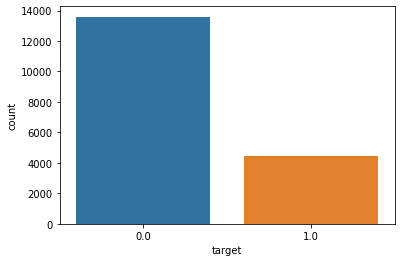

In [69]:
sns.countplot(df['target'])

We can see that our dataset is imbalanced dataset.We are going to use smote technique to deal with our imablanced dataset

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


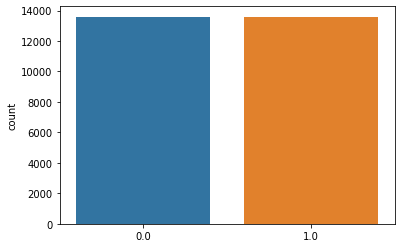

In [70]:
smote = SMOTE(random_state = 402)
X_smote, Y_smote = smote.fit_resample(X,Y)


sns.countplot(Y_smote)

### Train Test Split

In [71]:
X_train, X_val, y_train, y_val = train_test_split(X_smote, Y_smote, test_size = 0.2 ,random_state = 42)

We need to normalize our dataset so it will not get bias towards only particular feature

In [72]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_val=sc.fit(X_val)

### RandomCV

In [73]:
clf = XGBClassifier()

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

random_cv=RandomizedSearchCV(estimator=clf,param_distributions=params,
                             cv=5,n_iter=5,scoring='roc_auc',n_jobs=1,verbose=3,return_train_score=True,random_state=121)
random_cv.fit(X_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] subsample=0.6, min_child_weight=5, max_depth=3, gamma=2, colsample_bytree=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.6, min_child_weight=5, max_depth=3, gamma=2, colsample_bytree=0.8, score=(train=0.922, test=0.922), total=   2.0s
[CV] subsample=0.6, min_child_weight=5, max_depth=3, gamma=2, colsample_bytree=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  subsample=0.6, min_child_weight=5, max_depth=3, gamma=2, colsample_bytree=0.8, score=(train=0.923, test=0.920), total=   1.8s
[CV] subsample=0.6, min_child_weight=5, max_depth=3, gamma=2, colsample_bytree=0.8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


[CV]  subsample=0.6, min_child_weight=5, max_depth=3, gamma=2, colsample_bytree=0.8, score=(train=0.924, test=0.913), total=   1.8s
[CV] subsample=0.6, min_child_weight=5, max_depth=3, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.6, min_child_weight=5, max_depth=3, gamma=2, colsample_bytree=0.8, score=(train=0.923, test=0.915), total=   1.8s
[CV] subsample=0.6, min_child_weight=5, max_depth=3, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.6, min_child_weight=5, max_depth=3, gamma=2, colsample_bytree=0.8, score=(train=0.922, test=0.922), total=   1.8s
[CV] subsample=0.6, min_child_weight=10, max_depth=4, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.6, min_child_weight=10, max_depth=4, gamma=2, colsample_bytree=1.0, score=(train=0.930, test=0.927), total=   2.7s
[CV] subsample=0.6, min_child_weight=10, max_depth=4, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.6, min_child_weight=10, max_depth=4, gamma=2, colsample_bytree=1.0, score=(train=0.930, test=0.926), total=   2.7s


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   57.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...s_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='depre

In [74]:
#best parameter 
random_cv.best_params_

{'colsample_bytree': 0.8,
 'gamma': 1.5,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 0.6}

In [75]:
clf = XGBClassifier(colsample_bytree= 0.8,
 gamma= 1.5,
 max_depth= 5,
 min_child_weigh= 1,
 subsample= 0.6)

clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weigh=1, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.6, verbosity=1)

In [85]:
# score
clf.score(X_train,y_train)

0.8613205812028693

In [76]:
import pickle
file_name='job_change1.pickle'
pickle.dump(clf,open(file_name,'wb'))